<a href="https://colab.research.google.com/github/gautumsvp7/SolarDataSetPublic/blob/main/Solar_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving solar-energy-production-sites-1.csv to solar-energy-production-sites-1.csv


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['solar-energy-production-sites-1.csv'])) 
print(df)

                          Facility Name  ...                                 Address / Location
0    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
1    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
2    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
3    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
4    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
..                                  ...  ...                                                ...
377                    Ed Fountain Park  ...  1400 N Decatur Blvd\nLas Vegas, NV 89108\n(36....
378    Durango Hills Community Center S  ...  3521 N Durango Dr\nLas Vegas, NV 89129\n(36.22...
379                     Fire Station 44  ...  7701 W Washington Ave\nLas Vegas, NV 89128\n(3...
380               Centennial Hills Park 

In [5]:
df.describe()

,KW Rating,KWH Generated,Generated
count,382.000000,3.820000e+02,382.000000
mean,195.302618,3.724244e+05,32259.801047
std,658.166173,1.338346e+06,119224.015824
min,15.300000,2.745200e+04,1136.000000
25%,30.100000,4.942500e+04,4245.750000
50%,44.500000,7.208900e+04,6697.000000
75%,100.000000,1.468800e+05,11163.000000
max,3334.000000,6.759539e+06,805458.000000


In [6]:
print(df.groupby('Facility Name').size())

Facility Name
All American Park                           9
Centennial Hills Community Center N & S     9
Centennial Hills Park                      11
Durango Hills Community Center S           10
East Las Vegas Community Center            13
East Yard - Fire Equipment Center           9
East Yard - Main Gate 1                    17
East Yard - Sign Shop                      17
Ed Fountain Park                            9
Fire Station 10                            13
Fire Station 106                            8
Fire Station 107                            9
Fire Station 41                            13
Fire Station 43                            14
Fire Station 44                            13
Fire Station 45                            13
Fire Station 48                            13
Fire Station 5                             13
Fire Station 6                             13
Fire Station 7                             13
Fire Station 8                             13
Lorenzi Park        

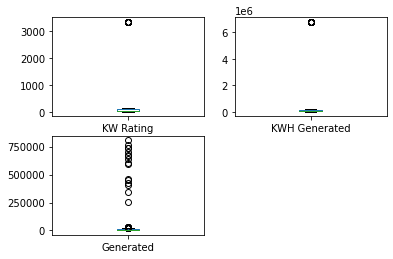

In [32]:
#Data Visualiztion
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey =False)
plt.show()

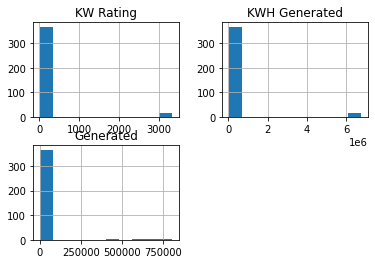

In [8]:
df.hist()
plt.show()

In [9]:
copy_df = df
f_names =set(copy_df['Facility Name'])


In [10]:
for col in copy_df.columns:
  print(col)

Facility Name
KW Rating
KWH Generated
Date
Generated
Address / Location


In [11]:
trimmed_df=copy_df.drop(['Date','Address / Location'],axis=1)

In [12]:
trimmed_df

,Facility Name,KW Rating,KWH Generated,Generated
0,Veterans Memorial Community Center,116.2,218498,22603
1,Veterans Memorial Community Center,116.2,218498,23330
2,Veterans Memorial Community Center,116.2,218498,17678
3,Veterans Memorial Community Center,116.2,218498,14427
4,Veterans Memorial Community Center,116.2,218498,10828
...,...,...,...,...
377,Ed Fountain Park,144.5,151050,20100
378,Durango Hills Community Center S,33.6,45246,2832
379,Fire Station 44,30.0,57914,6012
380,Centennial Hills Park,30.1,38876,4998


In [13]:
#creating dictionary to replace the names for easier analysis
list_loc = list(f_names)
d_loc = {}
ni = 0
for i in list_loc:
  d_loc[i] = ni
  ni += 1
print(d_loc)
#print(f_names)

{'Mirabelli Community Center': 0, 'Fire Station 7': 1, 'Fire Station 6': 2, 'WPCF Plant': 3, 'East Yard - Fire Equipment Center': 4, 'Fire Station 8': 5, 'Stupak Community Center': 6, 'All American Park': 7, 'East Yard - Sign Shop': 8, 'East Yard - Main Gate 1': 9, 'West Yard - Operations-Maintenance': 10, 'Rainbow Park': 11, 'Natural History Museum': 12, 'Fire Station 48': 13, 'Fire Station 41': 14, 'West Yard - Vehicle Services': 15, 'Centennial Hills Community Center N & S': 16, 'Fire Station 5': 17, 'West Yard - EOC': 18, 'Ed Fountain Park': 19, 'Fire Station 10': 20, 'Fire Station 43': 21, 'Veterans Memorial Community Center': 22, 'Fire Station 106': 23, 'Fire Station 45': 24, 'Lorenzi Park': 25, 'Durango Hills Community Center S': 26, 'Fire Station 107': 27, 'Fire Station 44': 28, 'Centennial Hills Park': 29, 'East Las Vegas Community Center': 30}


In [14]:
test_df = trimmed_df

In [15]:
nest_d = {'Facility Name':d_loc}
print(nest_d)

{'Facility Name': {'Mirabelli Community Center': 0, 'Fire Station 7': 1, 'Fire Station 6': 2, 'WPCF Plant': 3, 'East Yard - Fire Equipment Center': 4, 'Fire Station 8': 5, 'Stupak Community Center': 6, 'All American Park': 7, 'East Yard - Sign Shop': 8, 'East Yard - Main Gate 1': 9, 'West Yard - Operations-Maintenance': 10, 'Rainbow Park': 11, 'Natural History Museum': 12, 'Fire Station 48': 13, 'Fire Station 41': 14, 'West Yard - Vehicle Services': 15, 'Centennial Hills Community Center N & S': 16, 'Fire Station 5': 17, 'West Yard - EOC': 18, 'Ed Fountain Park': 19, 'Fire Station 10': 20, 'Fire Station 43': 21, 'Veterans Memorial Community Center': 22, 'Fire Station 106': 23, 'Fire Station 45': 24, 'Lorenzi Park': 25, 'Durango Hills Community Center S': 26, 'Fire Station 107': 27, 'Fire Station 44': 28, 'Centennial Hills Park': 29, 'East Las Vegas Community Center': 30}}


In [16]:
final_df = test_df.replace(to_replace = nest_d, value= None)

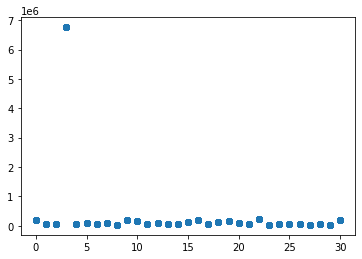

In [17]:
x1 = final_df['Facility Name']
x2 = final_df['KWH Generated']
plt.scatter(x1,x2)
plt.show()

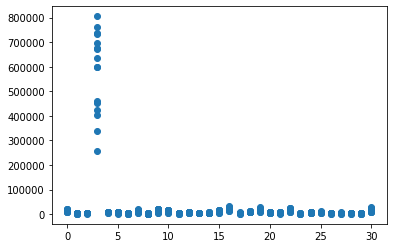

In [18]:
x1 = final_df['Facility Name']
x2 = final_df['Generated']
plt.scatter(x1,x2)
plt.show()


final_df should be used from this point onwards.
Facitlity name is the dependent variable.

# Training a model

In [19]:

array = final_df.values
print(array)


[[2.20000e+01 1.16200e+02 2.18498e+05 2.26030e+04]
 [2.20000e+01 1.16200e+02 2.18498e+05 2.33300e+04]
 [2.20000e+01 1.16200e+02 2.18498e+05 1.76780e+04]
 ...
 [2.80000e+01 3.00000e+01 5.79140e+04 6.01200e+03]
 [2.90000e+01 3.01000e+01 3.88760e+04 4.99800e+03]
 [1.00000e+01 7.93000e+01 1.46880e+05 1.09600e+04]]


In [20]:
final_df.shape

(382, 4)

To find the optimal numbers of clusters for applying K means, we are applying 'Elbow method'

In [21]:
X = final_df


In [22]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 



In [23]:

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 537112.7600982559
2 : 52534.97420596551
3 : 25268.338361526225
4 : 21728.466415627467
5 : 16799.946118009713
6 : 12279.72946986468
7 : 11598.651982953688
8 : 11119.404770987747
9 : 9445.568361617636


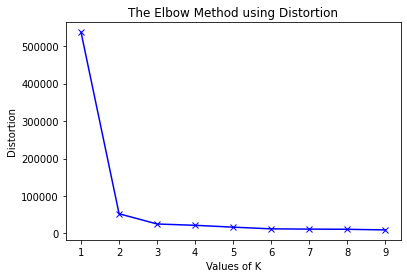

In [24]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


The value of K should be 2, as evident from the above graph

In [25]:
kmean = KMeans(n_clusters = 2)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
kmean.cluster_centers_

array([[1.49071038e+01, 5.80918033e+01, 9.32062951e+04, 8.37138525e+03],
       [3.00000000e+00, 3.33400000e+03, 6.75953900e+06, 5.78707312e+05]])

In [27]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

Cluster 1 Inertia 687852072982171.2
Cluster 2 Inertia 1607276938142.4058
Cluster 3 Inertia 627783396064.8383
Cluster 4 Inertia 284523705173.83417
Cluster 5 Inertia 185582728736.42566
Cluster 6 Inertia 126188272503.59438
Cluster 7 Inertia 95348343642.86224
Cluster 8 Inertia 71080579524.75583
Cluster 9 Inertia 55662633465.88332
Cluster 10 Inertia 46772884877.215065
Cluster 11 Inertia 38202472891.48056
Cluster 12 Inertia 29061537806.448
Cluster 13 Inertia 22288363335.88719
Cluster 14 Inertia 18938652085.88719
Cluster 15 Inertia 16639671074.435009
Cluster 16 Inertia 14222015951.383553
Cluster 17 Inertia 11779618779.716887
Cluster 18 Inertia 10499784105.607666
Cluster 19 Inertia 8932703000.549139


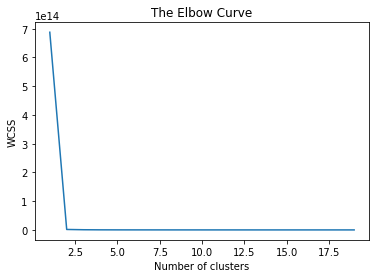

In [31]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()

In [33]:
# silhouette coeffiecient
silhouette_coefficients = []
for k in range(2,18):
  kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
  kemans.fit(final_df)
  score = silhouette_score(scaled_features,kmeans.labels_)
  silhouette_coefficients.append(score)

NameError: ignored